In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("/kaggle/input/housedata/data.csv")
df = pd.read_csv("/kaggle/input/housedata/output.csv")

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

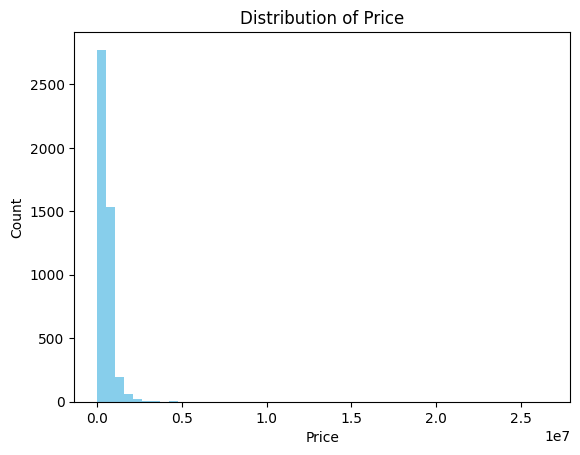

In [9]:
plt.hist(df['price'],bins=50,color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [10]:
df['price'].sort_values(ascending=False).head()
df['price'].sort_values().head()


4567    0.0
4588    0.0
4542    0.0
4374    0.0
4358    0.0
Name: price, dtype: float64

In [11]:
df['sqft_living'].sort_values(ascending=False).head()
df['sqft_living'].sort_values().head()

3778    370
2919    380
2416    420
1219    430
4184    490
Name: sqft_living, dtype: int64

In [12]:
print("Average price:", df['price'].mean())
print("Lowest price:", df['price'].min())
print("Highest price:", df['price'].max())


Average price: 551962.9884732141
Lowest price: 0.0
Highest price: 26590000.0


In [13]:
from sklearn.linear_model import LinearRegression 

x= df[['sqft_living']]
y= df['price']

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [14]:
df['PredictedPrice']=model.predict(x)

In [15]:
df['PriceCategory']=pd.cut(df['PredictedPrice'], 
                           bins=[0,150000,300000,800000,df['price'].max()],
                           labels=['Low','Medium','High','Very High'])

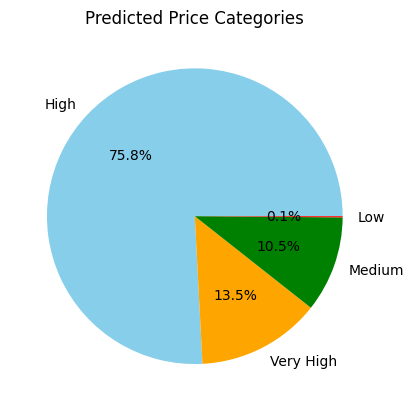

In [16]:
counts = df['PriceCategory'].value_counts()
plt.pie(counts,labels=counts.index, autopct='%1.1f%%',colors=['skyblue','orange','green','red'])
plt.title('Predicted Price Categories')
plt.show()

In [17]:
df['sqft_living'].sort_values(ascending=False).head()
df['sqft_living'].sort_values().head()


df['price'].sort_values(ascending=False).head()
df['price'].sort_values().head()

4567    0.0
4588    0.0
4542    0.0
4374    0.0
4358    0.0
Name: price, dtype: float64